# Imports

In [2]:
#io
import ND2Loader

# segmentation
import torch_seg
import keras_seg
from MicroscopyPreprocessor import MicroscopyPreprocessor

# utils
import numpy as np

# visualization
# from Visualizer import Visualizer as V

import segutils as su

# Read Data

In [3]:
nd2_tamar = ND2Loader.read_nd2('resources/images/live_demo/tamar/1.nd2')
ph3, fluo, ph3_thresh, fluo_thresh = nd2_tamar.channels

ph3_tamar = nd2_tamar.images[ph3]
fluo_tamar = nd2_tamar.images[fluo]
ph3_thresh_tamar = nd2_tamar.images[ph3_thresh]
fluo_thresh_tamar = nd2_tamar.images[fluo_thresh]

/usr/local/Caskroom/miniconda/base/envs/bio_research/lib/python3.7/site-packages/nd2reader/raw_metadata.py:171: UserWarning: Z-levels details missing in metadata. Using Z-coordinates instead.
  warnings.warn("Z-levels details missing in metadata. Using Z-coordinates instead.")


In [4]:
nd2_nitsan = ND2Loader.read_nd2('resources/images/live_demo/nitsan/1.nd2')
ph3, fluo, ph3_thresh, fluo_thresh = nd2_nitsan.channels

ph3_nitsan = nd2_nitsan.images[ph3]
fluo_nitsan = nd2_nitsan.images[fluo]
ph3_thresh_nitsan = nd2_nitsan.images[ph3_thresh]
fluo_thresh_nitsan = nd2_nitsan.images[fluo_thresh]

In [5]:
assert np.all(ph3_nitsan == ph3_tamar)
assert np.all(fluo_nitsan == fluo_tamar)
ph3 = ph3_tamar
fluo = fluo_tamar

# Human Segmentation

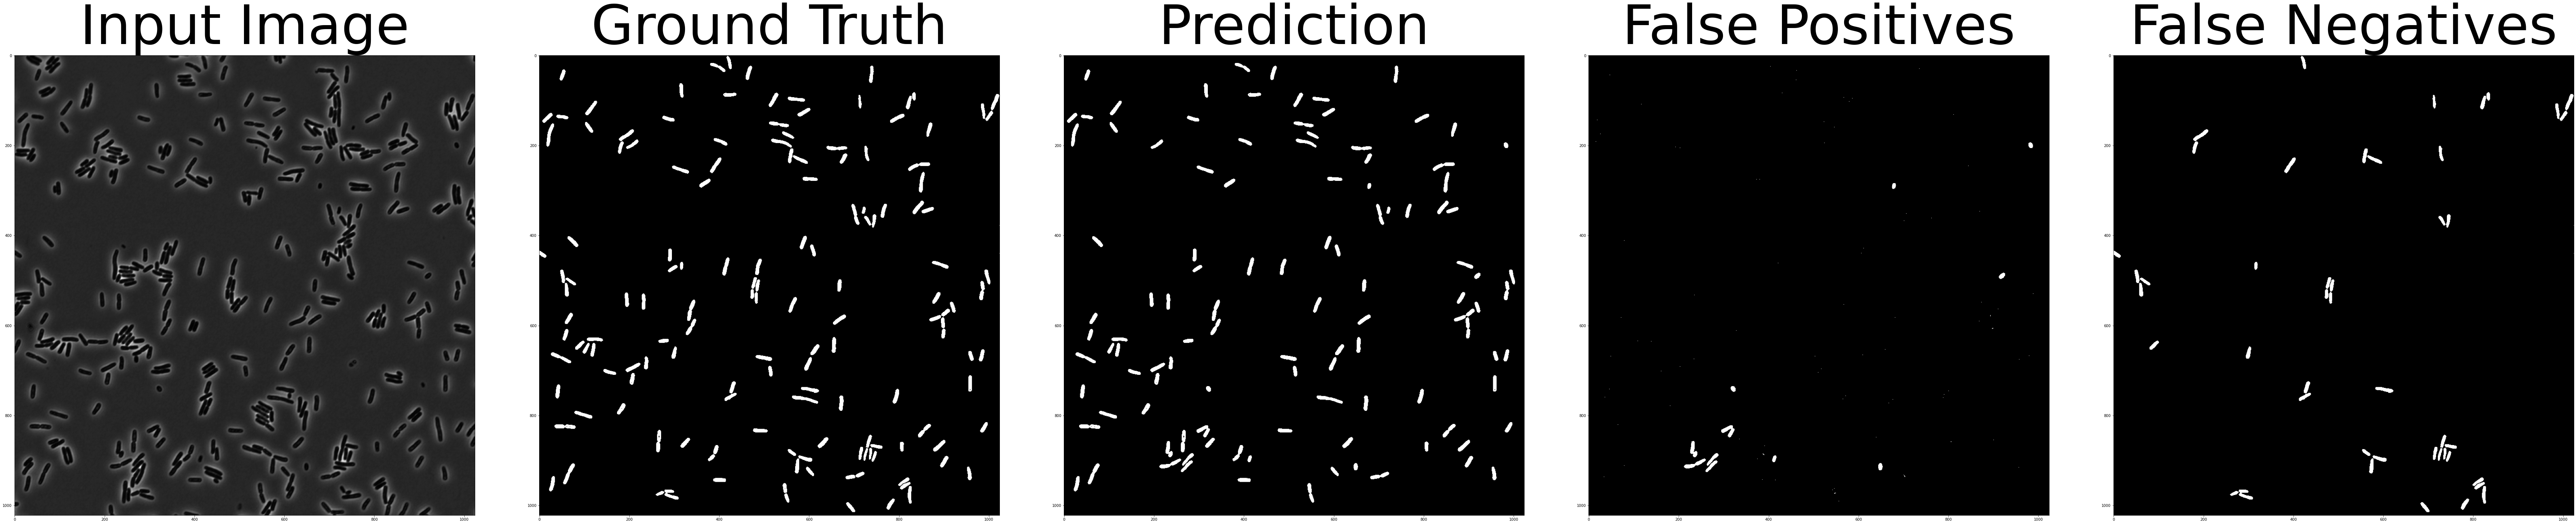

In [7]:
su.visutils.visual_mask_to_prediction_comparison(ph3[0], ph3_thresh_tamar[0], ph3_thresh_nitsan[0], threshold=0.5)

# Machine Segmentation

In [9]:
cell_masks, cell_boxes, cell_probs = torch_seg.full_segmentation(
    ph3,
    'resources/models/weights/pytorch_mask_rcnn_adam_30_epochs_state_dict.pkl',
    with_probs=True,
    threshold=0.95
)

fluo_cell_mixed_img = images = np.stack([ph3, fluo, fluo], axis=-1)

fluo_masks, fluo_boxes, fluo_probs = keras_seg.full_segmentation(
    fluo_cell_mixed_img,
    'resources/models/config/fluo_model.yaml',
    'resources/models/weights/fluo_FPN_Backbone.RESNET50_use-imagenet.True_epochs.30_loss.binary_crossentropy_plus_jaccard_loss_lr.0.1_decay.0.1_step.10_dropout.0.5.hd5',
    preprocessor=MicroscopyPreprocessor,
    threshold=0.5,
    with_probs=True
)

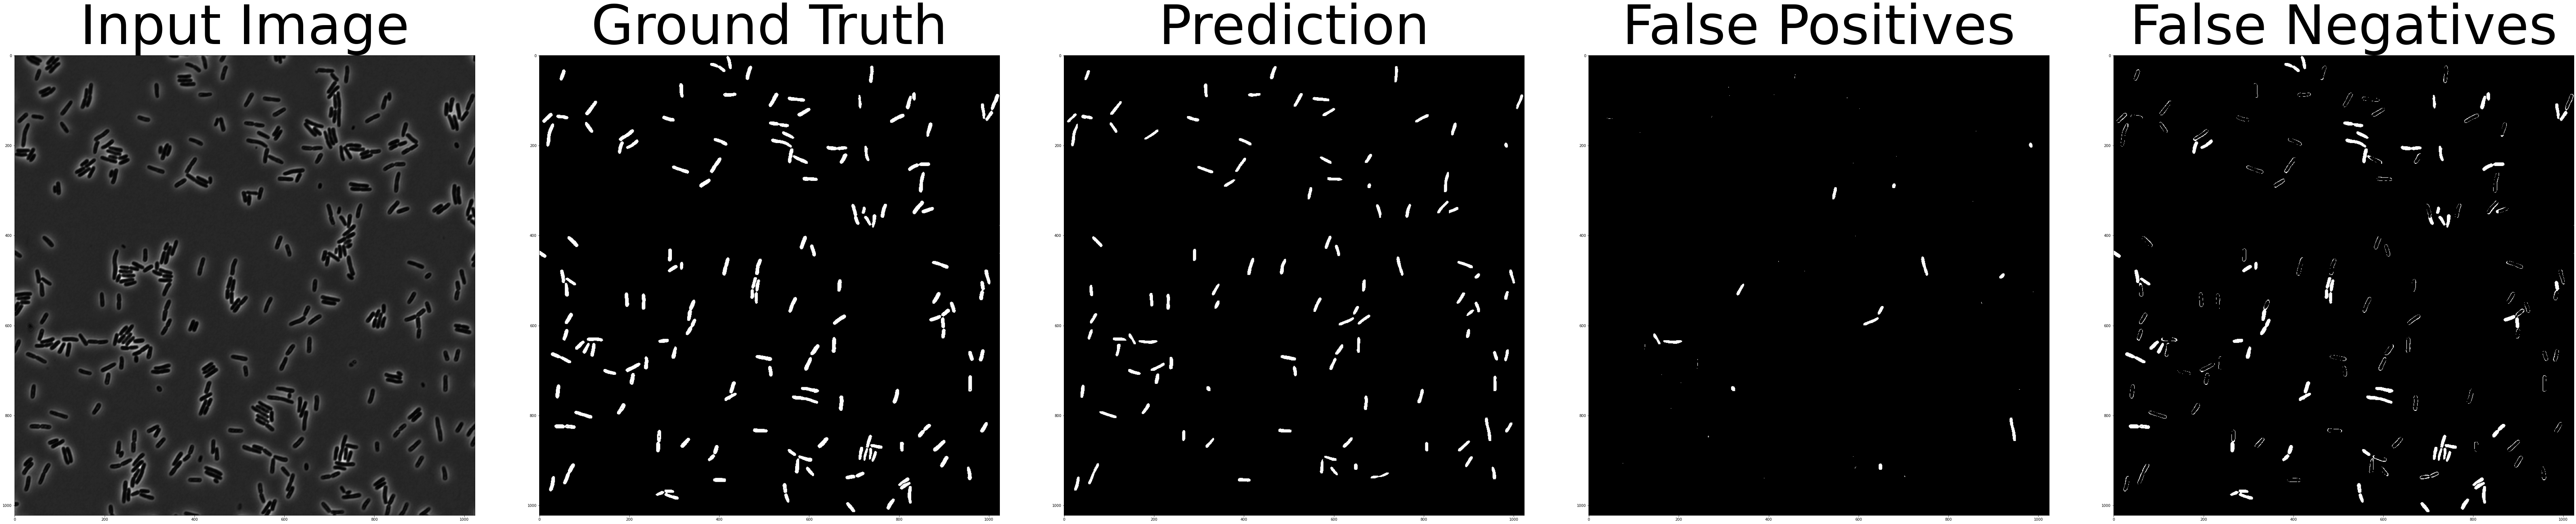

In [10]:
su.visutils.visual_mask_to_prediction_comparison(ph3[0], ph3_thresh_tamar[0], cell_probs[0], threshold=0.9)

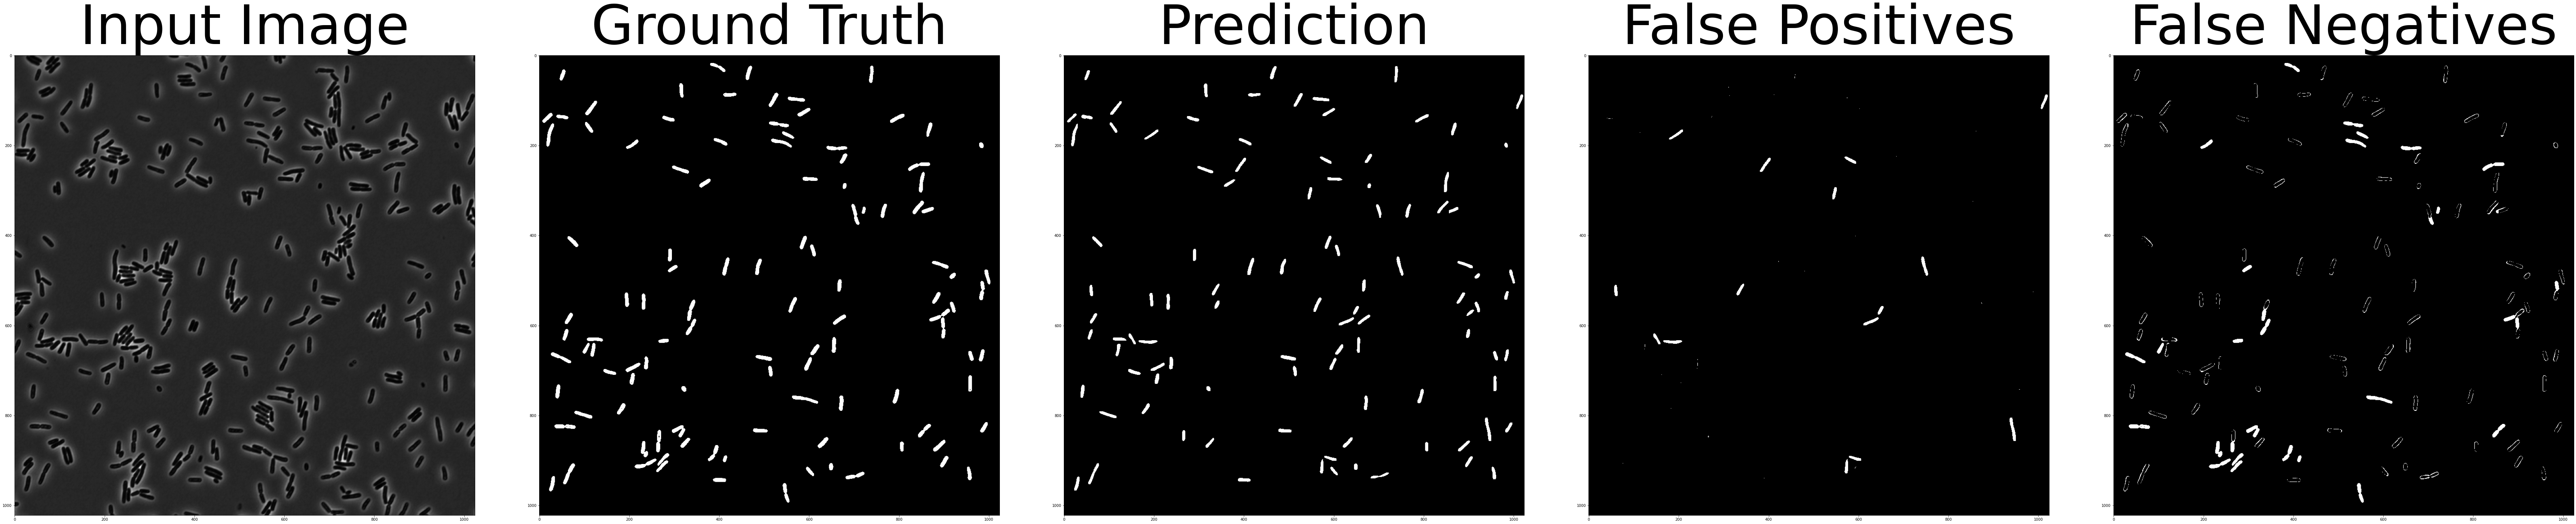

In [12]:
su.visutils.visual_mask_to_prediction_comparison(ph3[0], ph3_thresh_nitsan[0], cell_probs[0], threshold=0.9)